<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/unified_approach/3_Feature_Manipulation_and_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 - Understanding feautures and selecting the most important ones regarding the consumption



---



---



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/unified_approach/df_resampled.csv"

df = pd.read_csv(df_url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4074 entries, 0 to 4073
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  4074 non-null   int64  
 1   MONTH           4074 non-null   float64
 2   QUANTITY        4074 non-null   float64
 3   N_UFS           4074 non-null   float64
 4   N_ETB           4074 non-null   float64
 5   POPULATION      4074 non-null   float64
 6   P_MEDICAL       4074 non-null   float64
 7   PN_MEDICAL      4074 non-null   float64
 8   LIT_HC          4074 non-null   float64
 9   LIT_HP          4074 non-null   float64
 10  SEJ_MCO         4074 non-null   float64
 11  SEJ_HAD         4074 non-null   float64
 12  SEJ_PSY         4074 non-null   float64
 13  SEJ_SSR         4074 non-null   float64
 14  SEJ_SLD         4074 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 477.5 KB


## 3.1 - Create moving average feature based on medicine

In [ ]:
def calculate_moving_average(df, column, period):
    df_copy = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for medicine in df_copy['HOSPI_CODE_UCD'].unique():
        mask = df_copy['HOSPI_CODE_UCD'] == medicine
        ma_column = column + '_MA'

        # Calculate the moving average
        vector = df_copy.loc[mask, column].values
        moving_average = np.zeros_like(vector)

        # Calculate the moving average for each index in the vector
        for i in range(len(vector)):
            start = max(0, i - period + 1)
            end = i + 1
            moving_average[i] = np.nanmean(vector[start:end])

        df_copy.loc[mask, ma_column] = moving_average /  np.linalg.norm(moving_average)

    return df_copy

In [ ]:
def scatterplot_quantity(df, column, period):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['HOSPI_CODE_UCD'].unique())))

    for i, code in enumerate(df['HOSPI_CODE_UCD'].unique()):
        subset = df[df['HOSPI_CODE_UCD'] == code]
        plt.plot(subset[column], marker='o', linewidth=0.5, color=colors[i], label=code)

    plt.xlabel('Samples')
    plt.ylabel('Quantity')
    plt.title('Scatter Plot of Quantity moving average for the period of: ' + f'{period} months' )
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='HOSPI_CODE_UCD')
    plt.grid(True)
    plt.show()

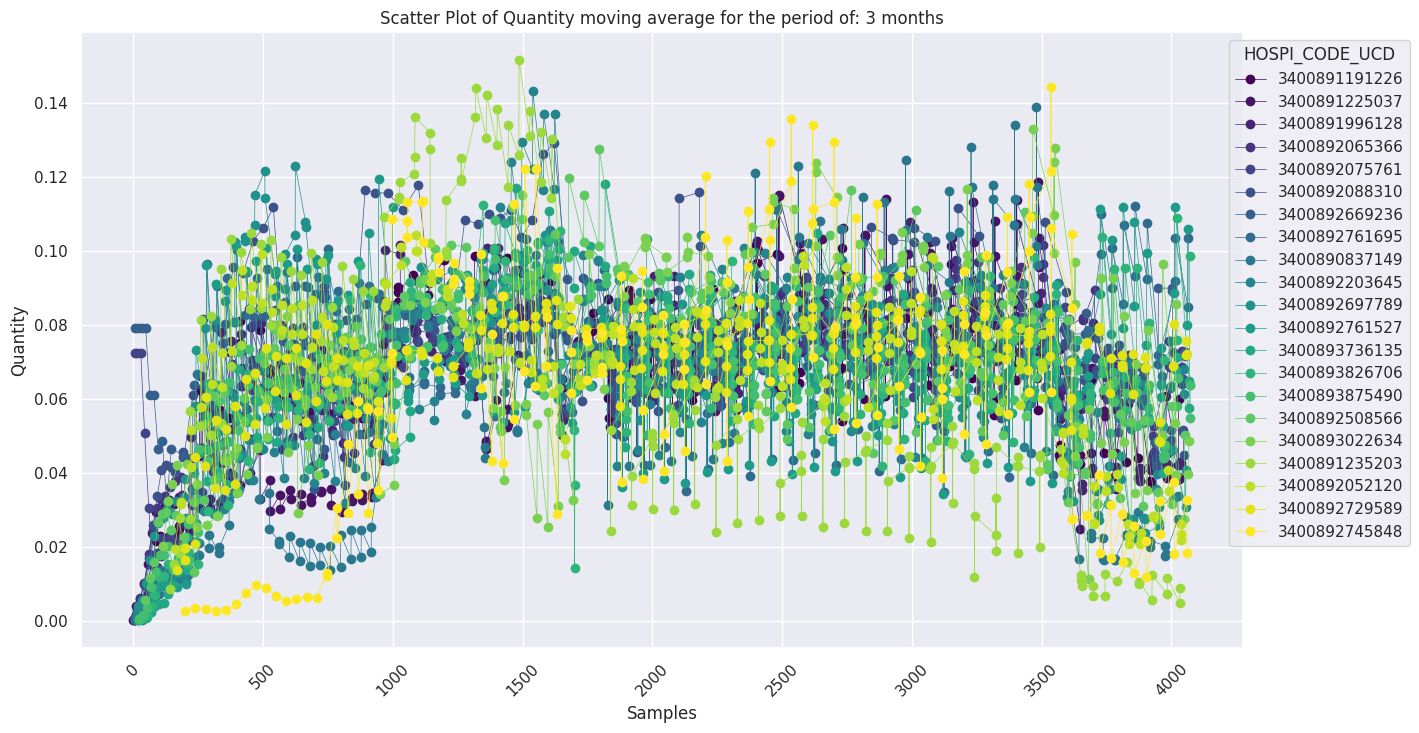

In [ ]:
df_ma_3 = calculate_moving_average(df.copy(), 'QUANTITY', 3)
df_ma_3 = df_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_ma_3, 'QUANTITY_MA', 3)

In [ ]:
month_dummies = pd.get_dummies(df_ma_3['MONTH'], prefix='MONTH')
hospi_dummies = pd.get_dummies(df_ma_3['HOSPI_CODE_UCD'], prefix='UCD')

df_encoded = pd.concat([df_ma_3, month_dummies, hospi_dummies], axis=1)
df_encoded = df_encoded.drop(['MONTH'], axis=1)

df_encoded.head()


,HOSPI_CODE_UCD,LIT_HC,LIT_HP,N_ETB,N_UFS,PN_MEDICAL,POPULATION,P_MEDICAL,QUANTITY,QUANTITY_MA,...,UCD_3400892669236,UCD_3400892697789,UCD_3400892729589,UCD_3400892745848,UCD_3400892761527,UCD_3400892761695,UCD_3400893022634,UCD_3400893736135,UCD_3400893826706,UCD_3400893875490
0,3400891191226,1471.0,112.0,12.0,1.0,5270.0,571675.0,683.0,10.0,0.000112,...,0,0,0,0,0,0,0,0,0,0
1,3400891225037,1471.0,112.0,12.0,1.0,5270.0,571675.0,683.0,20.0,0.000089,...,0,0,0,0,0,0,0,0,0,0
2,3400891996128,1471.0,112.0,12.0,1.0,5270.0,571675.0,683.0,110.0,0.000091,...,0,0,0,0,0,0,0,0,0,0
3,3400892065366,1471.0,112.0,12.0,1.0,5270.0,571675.0,683.0,30.0,0.000319,...,0,0,0,0,0,0,0,0,0,0
4,3400892075761,1471.0,112.0,12.0,1.0,5270.0,571675.0,683.0,2955.0,0.072353,...,0,0,0,0,0,0,0,0,0,0


## 3.2 - Correlation analysis

<Axes: >

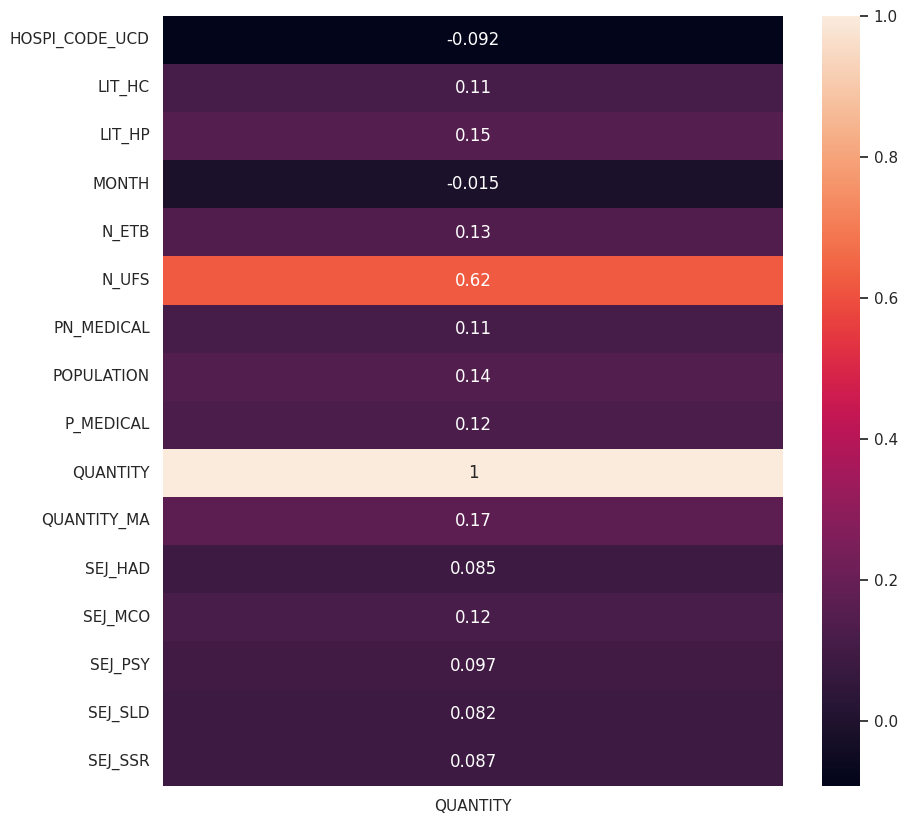

In [ ]:
corr = df_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

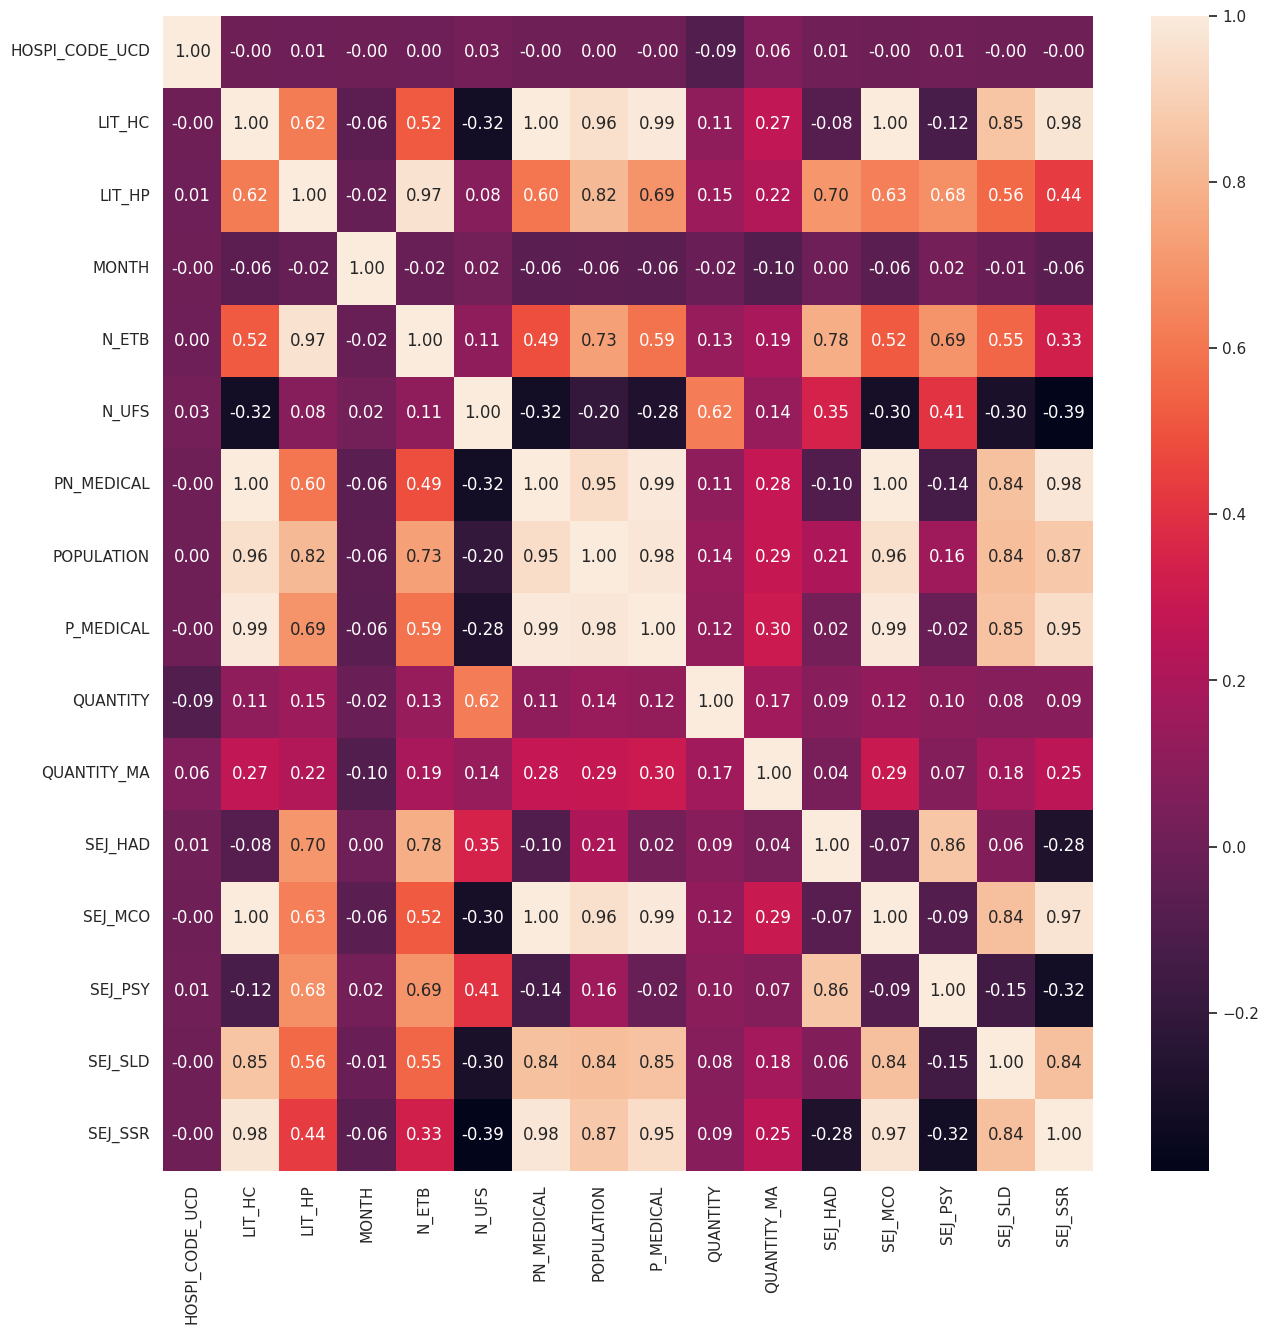

In [ ]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


In [ ]:
df_encoded.to_csv('df_ma.csv', index=False)